Ackermann steering geometry

Ackermann转向机器人的状态表示为$s = (x, y, \theta)$。刚体frame原点$(x,y)$位于机器人后轴中心。body frame的$x$轴指向偏航角$\theta$，$y$轴指向机器人的左侧。$v$表示机器人的速度，$\phi$表示前轮的转向角。当转向角固定为$\phi$时，机器人运动的圆形轨迹半径为 $r = L/\tan\phi$。 设$dw = r\cdot d\theta$ 表示$dt$时间后沿轨迹的距离。
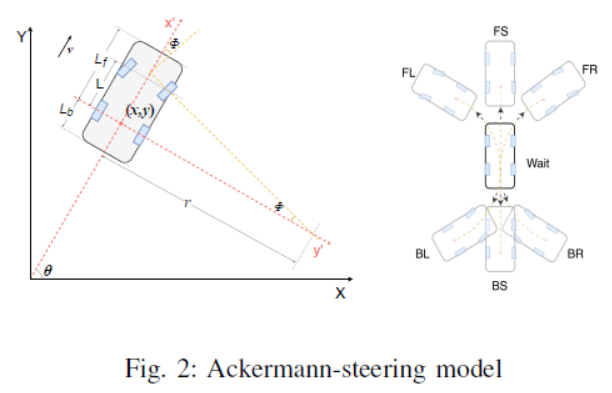

$\phi$和$\dot{\theta}$之间的运动学关系定义为：
$$\dot{\theta}=\frac{v}{L}\tan\phi \cdots (1)$$

在采样时间$T_s$通过离散化与递归积分，我们可以计算在时间戳$t$的机器人状态，如下所示：
$$s_t = \left[ \begin{matrix} x \\ y \\ \theta \end{matrix}\right]_t = \left[ \begin{matrix} x \\ y \\ \theta \end{matrix}\right]_{t-1} + T_s \left[ \begin{matrix} v\cos\theta \\ v\sin\theta \\ \frac{v}{L}\tan\phi \end{matrix}\right]_{t-1} \cdots (2)$$

机器人的速度$v$有界,$v_{bmax} \leq v \leq v_{fmax}$，其中$v_{bmax} < 0$和$v_{fmax} > 0$分别表示机器人向前或向后移动的最大速度。转向角受$\phi_{max}$限制，这意味着每个Ackermann转向机器人在整个路径上应保持最小转弯半径$r_{min}$。  

如图2所示，我们用$L_f$和$L_b$分别表示后轴到机器人前端和后端的距离。$W_r$表示机器人的宽度。对于状态为$(x_0,y_0,\theta_0)$的智能体，笛卡尔坐标系中智能体$C$的矩形形状可以定义为：
$$\begin{aligned}
C &= \left\{(x,y)\in\mathbb{R}^2, f(x,y) \leq 2 \right\} \\
f(x,y) & = \left| \frac{x^{'}}{L_b+L_f} + \frac{y^{'}}{W_r} \right| + \left| \frac{x^{'}}{L_b+L_f} - \frac{y^{'}}{W_r} \right| \cdots (3)
\end{aligned}$$
其中，
$$\left[ \begin{matrix} x^{'} \\ y^{'} \end{matrix}\right] = 
\left[ \begin{matrix} \cos\theta_0 & \sin\theta_0 \\ -\sin\theta_0 & \cos\theta_0 \end{matrix}\right]
\left[ \begin{matrix} x-x_0 \\ y-y_0 \end{matrix}\right]+ 
\left[ \begin{matrix} L_b \\ \frac{W_r}{2} \end{matrix}\right]$$

我们使用元组$\left<a_i, a_j, C_t^i, C_t^j, t \right>$表示当$C_t^i \cap C_t^j = \emptyset$时，在时间戳 $t$ 智能体$a_i$和$a_j$的碰撞或身体冲突。$C_t^i$表示$a_i$在时间戳 $t$ 的躯体矩形。

https://www.deepl.com/translator/files